In [1]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/PlantDiseasesDataset.zip'

In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/PlantDiseasesDataset.zip'
extract_dir = '/content/PlantDiseasesDataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Unzipped successfully to:", extract_dir)


Unzipped successfully to: /content/PlantDiseasesDataset


In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

base_path = '/content/PlantDiseasesDataset'
plants = [p for p in os.listdir(base_path) if not p.startswith('.')]

print("Here are the plants you can pick:")
for i, plant in enumerate(plants):
    print(f"{i+1}.{plant}")

Here are the plants you can pick:
1.Grape
2.Peach
3.Strawberry
4.Cherry
5.Apple
6.Bell pepper
7.Corn
8.Citrus
9.Tomato
10.Potato


In [5]:
choice = input("Type the number of the plant you want: ")

try:
    choice = int(choice) - 1
    if choice < 0 or choice >= len(plants):
        print("That's not a valid number")
        exit()
    selected_plant = plants[choice]
    print(f"You selected: {selected_plant}")
except:
    print("Please type a valis number")
    exit()

Type the number of the plant you want: 3
You selected: Strawberry


In [6]:
train_path = os.path.join(base_path, selected_plant, 'train')
valid_path = os.path.join(base_path, selected_plant, 'valid')

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='sparse'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='sparse'
)

Found 6146 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 347s 895ms/step - accuracy: 0.8931 - loss: 0.3354 - val_accuracy: 0.6667 - val_loss: 1.6480
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 345s 896ms/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.7500 - val_loss: 0.8970
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 341s 886ms/step - accuracy: 0.9918 - loss: 0.0280 - val_accuracy: 0.7500 - val_loss: 0.4164
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 383s 888ms/step - accuracy: 0.9964 - loss: 0.0163 - val_accuracy: 0.8333 - val_loss: 0.4080
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 341s 885ms/step - accuracy: 0.9949 - loss: 0.0142 - val_accuracy: 0.7500 - val_loss: 1.2167
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 342s 889ms/step - accuracy: 0.9958 - loss: 0.0279 - val_accuracy: 0.7500 - val_loss: 1.8536
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 342s 889ms/step - accuracy: 0.9935 - loss: 0.0245 - val_accuracy: 0.7500 - val_loss: 1.1511
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 343s 890ms/step - accuracy: 0.9965 -

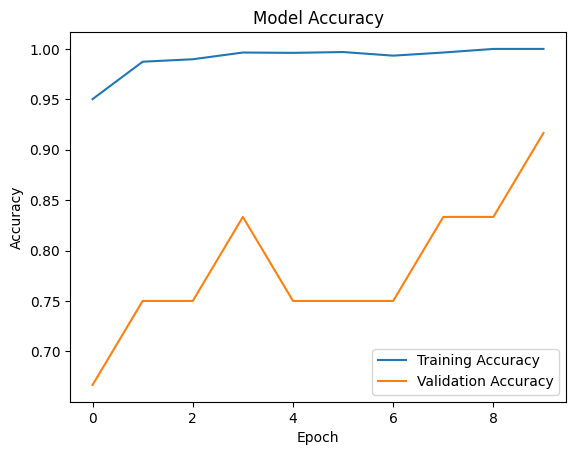

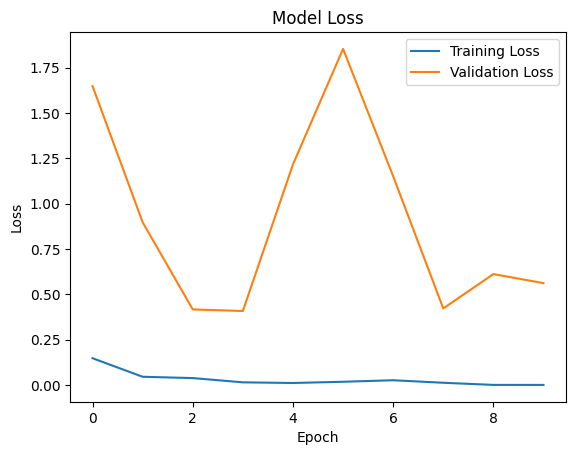

In [11]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


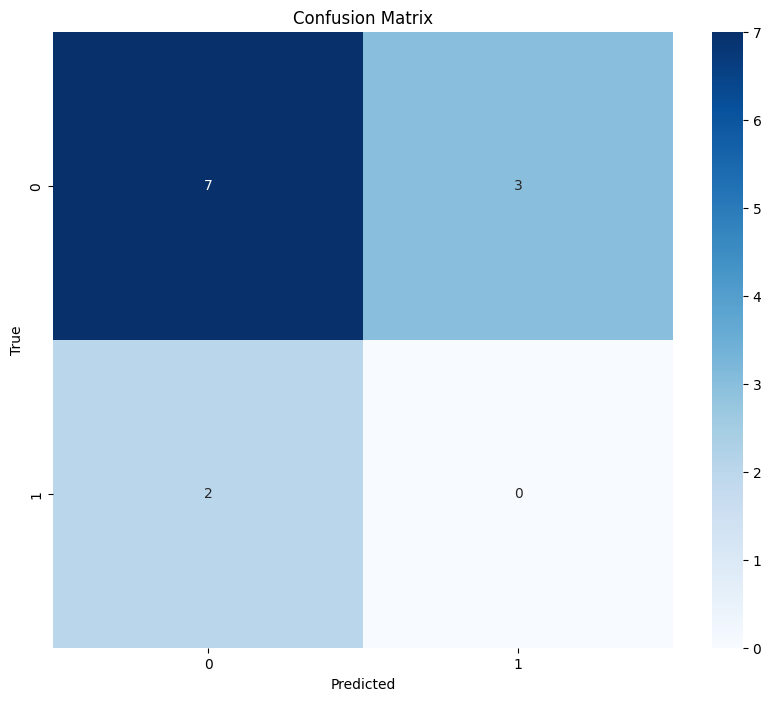

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np


Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)


y_true = valid_generator.classes

cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.00      0.00      0.00         2

    accuracy                           0.58        12
   macro avg       0.39      0.35      0.37        12
weighted avg       0.65      0.58      0.61        12



In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [15]:
img_path = "/content/drive/MyDrive/peach_1.png"
img = image.load_img(img_path, target_size=(180, 180))

In [16]:
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [17]:
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [18]:
predicted_class = np.argmax(predictions[0])

In [19]:
class_names = list(train_generator.class_indices.keys())
print(f"The robot thinks it's: {class_names[predicted_class]}")

The robot thinks it's: Strawberry Healthy


In [20]:
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")

Strawberry Healthy: 100.00%
Strawberry Leaf scorch: 0.00%
